<a href="https://colab.research.google.com/github/saramony/Assignment-3/blob/master/Assignment_7_Image_Processing_With_a_CNN_Aramony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.getcwd()

'/content'

In [0]:
#unzip's Cats file
!unzip Cats.zip

Archive:  Cats.zip
  inflating: Cats/cat.0.jpg          
  inflating: Cats/cat.1.jpg          
  inflating: Cats/cat.10.jpg         
  inflating: Cats/cat.100.jpg        
  inflating: Cats/cat.1000.jpg       
  inflating: Cats/cat.10000.jpg      
  inflating: Cats/cat.10001.jpg      
  inflating: Cats/cat.10002.jpg      
  inflating: Cats/cat.10003.jpg      
  inflating: Cats/cat.10004.jpg      
  inflating: Cats/cat.10005.jpg      
  inflating: Cats/cat.10006.jpg      
  inflating: Cats/cat.10007.jpg      
  inflating: Cats/cat.10008.jpg      
  inflating: Cats/cat.10009.jpg      
  inflating: Cats/cat.1001.jpg       
  inflating: Cats/cat.10010.jpg      
  inflating: Cats/cat.10011.jpg      
  inflating: Cats/cat.10012.jpg      
  inflating: Cats/cat.10013.jpg      
  inflating: Cats/cat.10014.jpg      
  inflating: Cats/cat.10015.jpg      
  inflating: Cats/cat.10016.jpg      
  inflating: Cats/cat.10017.jpg      
  inflating: Cats/cat.10018.jpg      
  inflating: Cats/cat.10019.jpg

In [0]:
#unzip's Dogs file
!unzip Dogs.zip

Archive:  Dogs.zip
  inflating: Dogs/dog.10.jpg         
  inflating: Dogs/dog.100.jpg        
  inflating: Dogs/dog.1000.jpg       
  inflating: Dogs/dog.10000.jpg      
  inflating: Dogs/dog.10001.jpg      
  inflating: Dogs/dog.10002.jpg      
  inflating: Dogs/dog.10003.jpg      
  inflating: Dogs/dog.10004.jpg      
  inflating: Dogs/dog.10005.jpg      
  inflating: Dogs/dog.10006.jpg      
  inflating: Dogs/dog.10007.jpg      
  inflating: Dogs/dog.10008.jpg      
  inflating: Dogs/dog.10009.jpg      
  inflating: Dogs/dog.1001.jpg       
  inflating: Dogs/dog.10010.jpg      
  inflating: Dogs/dog.10011.jpg      
  inflating: Dogs/dog.10012.jpg      
  inflating: Dogs/dog.10013.jpg      
  inflating: Dogs/dog.10014.jpg      
  inflating: Dogs/dog.10015.jpg      
  inflating: Dogs/dog.10016.jpg      
  inflating: Dogs/dog.10017.jpg      
  inflating: Dogs/dog.10018.jpg      
  inflating: Dogs/dog.10019.jpg      
  inflating: Dogs/dog.1002.jpg       
  inflating: Dogs/dog.10020.jpg

Coding Section

In [0]:
#Defines the labeling funciton to classify dogs vs. cats
def label_img(img_name):
  if 'cat' in img_name: return [1, 0]
  elif 'dog' in img_name: return [0, 1]

In [0]:

!pip install jupyterthemes

     |████████████████████████████████| 7.0MB 2.9MB/s 
     |████████████████████████████████| 9.7MB 33.1MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 491kB 43.7MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for tornado: filename=tornado-6.0.3-cp36-cp36m-linux_x86_64.whl size=423198 sha256=d6c8a7eff48027062a561449d8bb40999eea66f9d65acc1ea29920dc1a3587bf
  Stored in directory: /root/.cache/pip/wheels/84/bf/40/2f6ef700f48401ca40e5e3dd7d0e3c0a90e064897b7fe5fc08
Successfully built tornado
ERROR: google-colab 1.0.0 has requirement notebook~=5.2.0, but you'll have notebook 6.0.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=4.5.0, but you'll have tornado 6.0.3 which is incompatible.
  Found existing installation: tornado 4.5.3
    Uninstalling tornado-4.5.3:
      Successfully uninstalled tornado-4.5.3
  Found existing installation: notebook 5.2.2
    Uninstalling notebook-5.2.2:
  

In [0]:
!pip install -U -q PyDrive

In [0]:
%matplotlib inline

import os
import io

# Core
import pandas as pd
import numpy as np

# Visuals
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# jt themes
from jupyterthemes import jtplot

# Display Images
from PIL import Image, ImageFilter

# IPython display
from IPython.display import display

# Loading Zip Files
import zipfile

# Working with images
import cv2

# Progress Bar (for long processes)
from tqdm import tqdm

In [0]:
import tensorflow as tf
import time

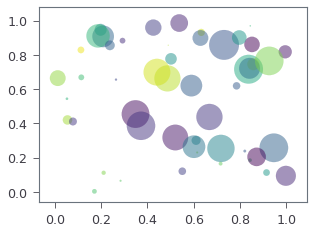

In [0]:
# Test Theme
!jt -t grade3 -f fira -fs 115
jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Globals

In [0]:
RANDOM_SEED = 42

IMG_WIDTH = 75
IMG_HEIGHT = 75
IMG_CHANNELS = 1

IMG_SHAPE = [IMG_WIDTH, IMG_HEIGHT]
IMG_LENGTH = IMG_WIDTH * IMG_HEIGHT

In [0]:
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

Project Dataset
Cats Vs. Dogs Training Data
Load the cats vs. dogs dataset from Collab

In [0]:
def label_img(img_name):
  if 'cat' in img_name: return [1, 0]
  elif 'dog' in img_name: return [0, 1]

In [0]:
#splits the training data from Cats and DOgs and imports it
training_data = []

with zipfile.ZipFile('/content/train.zip', 'r') as z:
  for fn in tqdm(z.namelist()):
    if not os.path.isdir(fn) and fn.endswith("jpg"):
      label = label_img(fn)

      img_str = z.read(fn)

      nparr = np.frombuffer(img_str, np.uint8)

      img_np = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img_np, (IMG_WIDTH, IMG_HEIGHT))

      training_data.append([ np.array(img), np.array(label)])


100%|██████████| 24994/24994 [00:28<00:00, 881.34it/s]


In [0]:
#Explores the dataset
training_data[0]

[array([[170, 174, 181, ..., 214, 210, 206],
        [170, 174, 181, ..., 216, 212, 208],
        [170, 175, 181, ..., 217, 215, 210],
        ...,
        [129, 133, 135, ...,   3,   3,   2],
        [127, 129, 131, ...,   3,   3,   2],
        [124, 128, 131, ...,   2,   2,   2]], dtype=uint8), array([1, 0])]

In [0]:
#Defines a function to look at label and training data
def peek_img( index, data = training_data):
  img_type = 'Unknown'
  
  if np.array_equal(data[index][1], [1, 0]): img_type = 'Cat'
  elif np.array_equal(data[index][1], [0, 1]): img_type = 'Dog'
  
  imshow(data[index][0], cmap = 'gray', interpolation = 'bicubic')
  plt.title(img_type)
  plt.show()

In [0]:
#looks at some of the training data
training_data[0][0]

array([[170, 174, 181, ..., 214, 210, 206],
       [170, 174, 181, ..., 216, 212, 208],
       [170, 175, 181, ..., 217, 215, 210],
       ...,
       [129, 133, 135, ...,   3,   3,   2],
       [127, 129, 131, ...,   3,   3,   2],
       [124, 128, 131, ...,   2,   2,   2]], dtype=uint8)

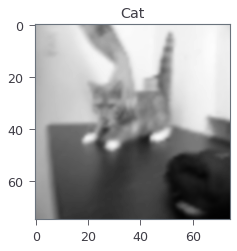

In [0]:
#Now to test if we can see an image

peek_img(0)

In [0]:
#Need to test this for Dogs as well.
dog_index = -1

for i, x in enumerate(training_data):
  if np.array_equal(x[1], [0, 1]):
    dog_index = i
    break

dog_index

12500

In [1]:
#Tests the peek function - is it a dog - waht does it look like (grey)
peek_img(dog_index)

NameError: ignored

In [0]:
#Defines a function to look at random images, and display their training label

def plot_images(images, cls_true, indexes = None, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.5, wspace=1.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(IMG_SHAPE), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis, and the image index on the y-axis.
        ax.set_xlabel(xlabel)
        
        if indexes != None:
          ax.set_ylabel(indexes[i])
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
#Defines the indixes
def plot_indexes(indexes):
  subset = [training_data[i] for i in indexes]

  images = []
  labels = []

  for i in subset:
    x, y = i

    images.append(x)

    if np.array_equal(y, [1, 0]): labels.append('Cat')
    elif np.array_equal(y, [0, 1]): labels.append('Dog')

  plot_images(images, labels, indexes)

In [0]:
#Get random indices

import random

indexes = []

for x in range(9):
  indexes.append(random.randint(0, len(training_data)))

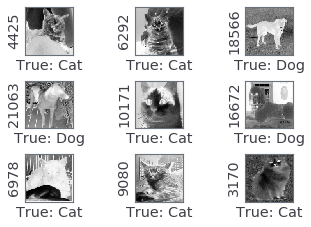

In [0]:
#Now let's plot some of these and test the new plot indexes function
plot_indexes(indexes)

In [0]:
#Shuffles the training data

from random import shuffle 

shuffle(training_data)

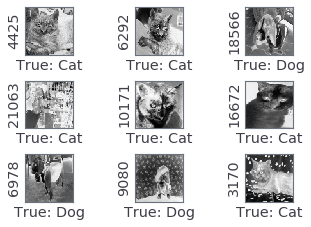

In [0]:
#Replots the same images - makes sure they were shuffled
plot_indexes(indexes)


In [0]:
#Splits the Train and Test functions
train_size = int(len(training_data) * .8)
train_size

19994

In [0]:

train = training_data[-train_size:]
display('Train Size: {}'.format(len(train)))

test = training_data[:-train_size]
display('Test Size: {}'.format(len(test)))

'Train Size: 19994'

'Test Size: 4999'

In [0]:
#Training Data
X_train = np.array([i[0] for i in train]).reshape(-1,IMG_WIDTH, IMG_HEIGHT,1)
y_train = np.array([i[1] for i in train])

In [0]:
#Test Data
X_test = np.array([i[0] for i in test]).reshape(-1,IMG_WIDTH, IMG_HEIGHT,1)
y_test = np.array([i[1] for i in test])

Deep Classification Model

In [0]:
#Defines the Model Learning Rate 
LR = 1e-3

In [0]:
#Defines the Model Name
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [0]:
#Installs TensorFlow
!pip install tflearn


In [0]:
#Imports the relevant information 
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [0]:
#Creates function to define the model versions
def get_model_baseline():
  convnet = input_data(shape=[None, IMG_WIDTH, IMG_HEIGHT, 1], name='input')

  convnet = conv_2d(convnet, 32, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = conv_2d(convnet, 64, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = fully_connected(convnet, 1024, activation='relu')
  convnet = dropout(convnet, 0.8)

  convnet = fully_connected(convnet, 2, activation='softmax')
  convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

  return tflearn.DNN(convnet, tensorboard_dir='log')

In [0]:
def get_model_v2():
  convnet = input_data(shape=[None, IMG_WIDTH, IMG_HEIGHT, 1], name='input')

  convnet = conv_2d(convnet, 32, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = conv_2d(convnet, 64, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = conv_2d(convnet, 128, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = conv_2d(convnet, 64, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = conv_2d(convnet, 32, 5, activation='relu')
  convnet = max_pool_2d(convnet, 5)

  convnet = fully_connected(convnet, 1024, activation='relu')
  convnet = dropout(convnet, 0.8)

  convnet = fully_connected(convnet, 2, activation='softmax')
  convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

  return tflearn.DNN(convnet, tensorboard_dir='log')

In [0]:
#Tests the Model Fit
display('Train Size: {}'.format(len(X_train)))

'Train Size: 19994'

In [0]:
#Resets the graph to default state and train on selected data set (note including clock time)
reset_graph()

model_baseline = get_model_baseline()

start_time = time.clock()

model_baseline.fit({'input': X_train}, {'targets': y_train}, n_epoch=3, validation_set=({'input': X_test}, {'targets': y_test}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

end_time = time.clock()

runtime = end_time - start_time  # seconds of wall-clock time

Training Step: 938  | total loss: 11.06059 | time: 101.912s
| Adam | epoch: 003 | loss: 11.06059 - acc: 0.5196 -- iter: 19968/19994
Training Step: 939  | total loss: 11.24974 | time: 109.411s
| Adam | epoch: 003 | loss: 11.24974 - acc: 0.5114 | val_loss: 11.56129 - val_acc: 0.4979 -- iter: 19994/19994
--


In [0]:
display('Model Train Time: {} minutes'.format(round(runtime / 100, 2)))

'Model Train Time: 6.34 minutes'

In [0]:
#Resets the graph to default state and train on selected data
reset_graph()

model_v2 = get_model_v2()

start_time = time.clock()

model_v2.fit({'input': X_train}, {'targets': y_train}, n_epoch=3, validation_set=({'input': X_test}, {'targets': y_test}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

end_time = time.clock()

runtime = end_time - start_time  # seconds of wall-clock time

Training Step: 938  | total loss: 0.47834 | time: 124.110s
| Adam | epoch: 003 | loss: 0.47834 - acc: 0.7597 -- iter: 19968/19994
Training Step: 939  | total loss: 0.47796 | time: 131.879s
| Adam | epoch: 003 | loss: 0.47796 - acc: 0.7587 | val_loss: 0.49111 - val_acc: 0.7666 -- iter: 19994/19994
--


In [0]:
display('Model Train Time: {} minutes'.format(round(runtime / 100, 2)))

'Model Train Time: 7.25 minutes'

Validation

In [0]:
#loads the test data
test_data = []

with zipfile.ZipFile('/content/test.zip', 'r') as z:
  for fn in tqdm(z.namelist()):
    if not os.path.isdir(fn) and fn.endswith("jpg"):
      label = label_img(fn)

      img_str = z.read(fn)

      nparr = np.frombuffer(img_str, np.uint8)

      img_np = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img_np, (IMG_WIDTH, IMG_HEIGHT))

      test_data.append([ np.array(img), np.array(label)])

100%|██████████| 12501/12501 [00:13<00:00, 926.42it/s]


In [0]:
#now we create a visual inspection function to test
import matplotlib.pyplot as plt

def visual_inspect_model( model ):
  fig=plt.figure(figsize=(5,5))
  fig.subplots_adjust(hspace=0.5, wspace=1.3)

  for num,data in enumerate(test_data[:12]):

      img_num = data[1]
      img_data = data[0]

      y = fig.add_subplot(4,3,num+1)
      orig = img_data
      data = img_data.reshape(IMG_WIDTH,IMG_HEIGHT,1)

      model_out = model.predict([data])[0]

      if np.argmax(model_out) == 1: str_label='Dog'
      else: str_label='Cat'

      y.imshow(orig,cmap='gray')
      plt.title(str_label)
      y.axes.get_xaxis().set_visible(False)
      y.axes.get_yaxis().set_visible(False)

  plt.show()

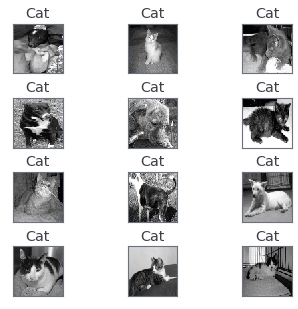

In [0]:
#Actual Visual Inspection for Model 1
visual_inspect_model(model_baseline)


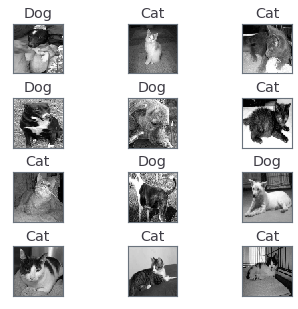

In [0]:
#Visual inspection for model 2
visual_inspect_model(model_v2)


In [0]:
#Creates a test data sumary function
def validate_model(model):
  total = len(X_test)
  correct = 0

  for num, data in enumerate(X_test):
    y_pred = model.predict([data])[0]

    if np.argmax(y_pred) == 1: img_pred='Dog'
    else: img_pred='Cat'

    if np.array_equal(y_test[num], [1, 0]): img_actual = 'Cat'
    elif np.array_equal(y_test[num], [0, 1]): img_actual = 'Dog'

    if img_actual == img_pred:
      correct = correct + 1

  display('Total Test Images: {}, Correctly Predicted: {}, {:.2%}'.format(total, correct, correct / total))

In [0]:
#Runs Stats for Model 1
validate_model(model_baseline)


'Total Test Images: 4999, Correctly Predicted: 2489, 49.79%'

In [0]:
#Runs Stats for Model 2
validate_model(model_v2)


'Total Test Images: 4999, Correctly Predicted: 3832, 76.66%'